In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('BPD_Data_Final_NoDeath.xlsx')

data.loc[data['Severe BPD']==1, 'BPD'] = 1
data.loc[data['MGSO4']==3, 'MGSO4'] = 2
data.loc[data['Maternal_Smoking']=='-', 'Maternal_Smoking'] = np.nan

In [3]:
data.iloc[:3,2:22]

,Birth Gestation (weeks),Birth Weight (grams),Growth retardation,BWcentile,SEX,ANCS,MGSO4,PPROM,C-SEC,Twins,Maternal_Smoking,Maternal Chorio,Maternal Infection,Maernal antibiotics,IB/OB,Intubated in Delivery,Surfactant (Y/N),Surfactant NoDoses,ADM TEMP,Respiratory support_36weeks
0,28,1110,2,50-75th,2,1,2,2.0,1,2.0,2,2.0,2.0,2.0,1,1.0,1.0,2.0,37.7,UNSPECIFIED
1,25,620,2,10-25th,1,1,1,2.0,1,2.0,2,2.0,2.0,1.0,1,1.0,1.0,2.0,37.3,High flow
2,28,700,1,2-9th,1,1,1,2.0,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,36.9,NaN


In [7]:
XX = data[['Birth Gestation (weeks)', 'Birth Weight (grams)', 'SEX', 'ANCS', 'MGSO4', 'PPROM',
           'C-SEC', 'Twins', 'Intubated in Delivery', 'Surfactant (Y/N)', 'ADM TEMP', 'Severe BPD', 'BPD']]

XX = data[['Birth Gestation (weeks)', 'Birth Weight (grams)', 'SEX', 'ADM TEMP', 'Severe BPD', 'BPD']]

XX = data[['Birth Gestation (weeks)', 'Birth Weight (grams)', 'ADM TEMP', 'Severe BPD', 'BPD']]


print(XX.shape)
XX = XX.dropna()
print(XX.shape)

XX.loc[XX['BPD']==2, 'BPD'] = 0
XX.loc[XX['Severe BPD']==1, 'BPD']=2

YY = XX['BPD'].to_frame()
XX = XX.drop(columns=['Severe BPD', 'BPD'])

(153, 5)
(144, 5)


In [4]:
XX = data.iloc[:,2:23]
XX = XX.drop(columns=['Growth retardation', 'BWcentile',
                      'Surfactant NoDoses', 'Respiratory support_36weeks', 'Maternal_Smoking', 'Maternal Chorio', 'Maternal Infection', 'Maernal antibiotics'#, 'IB/OB'
                     ])
# XX = XX[~(XX['Maternal_Smoking']=='-')]
XX.loc[XX['MGSO4']==3, 'MGSO4'] = 2

XX = data['Birth Gestation (weeks)', 'Birth Weight (grams)']

# XX['Severe BPD'] = data.iloc[:,22]
print(XX.shape)
XX = XX.dropna()
print(XX.shape)

YY = XX['Severe BPD'].to_frame()
XX = XX.drop(columns=['Severe BPD'])

# YY.loc[YY['Severe BPD']==2, 'Severe BPD'] = 0

(153, 13)
(143, 13)


In [9]:
YY['BPD'].value_counts()

1.0    63
2.0    50
0.0    31
Name: BPD, dtype: int64

In [4]:
XX[:3]

NameError: name 'XX' is not defined

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=np.int, sparse=True)
# nominals = pd.DataFrame(onehot.fit_transform(XX.iloc[:,2:-1]).toarray())
nominals = onehot.fit_transform(XX.iloc[:,2:-1]).toarray()
nominals.shape
# nominals = onehot.fit_transform(XX.iloc[:,[2,3,4,5,6,7,12,13,14]]).toarray()

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss_X = StandardScaler()
XXX = ss_X.fit_transform(XX.iloc[:,[0,1,-1]])

# mm_X = MinMaxScaler()
# XXX = mm_X.fit_transform(XX.iloc[:,[1,-1]])

In [12]:
XX.iloc[:,0].value_counts()

27    37
26    33
28    30
25    23
24    15
23     6
Name: Birth Gestation (weeks), dtype: int64

In [13]:
XXX[:3]

array([[-0.83289315, -1.27841087,  0.35316561],
       [ 1.28363532,  0.57838124, -0.64400788],
       [ 1.28363532,  2.23972156,  0.25344826]])

In [14]:
# X_final = np.concatenate(((XX.iloc[:,0].reshape(-1,1)-23), XXX), axis=1)
X_final = XXX
X_final.shape

(144, 3)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_final,YY,test_size=0.25,random_state=1)

In [16]:
np.unique(y_test, return_counts=True)

(array([0., 1., 2.]), array([10, 20,  6]))

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
#1. linear
linear_svr = SVC(kernel='linear', C=2)
linear_svr.fit(X_train,y_train)
linear_svr_y_predict = linear_svr.predict(X_test)
print('R-squared value of linear SVR is',linear_svr.score(X_test,y_test))
print(confusion_matrix(y_test, linear_svr_y_predict))
print(classification_report(y_test, linear_svr_y_predict))
#2. poly
poly_svr = SVC(kernel='poly')
poly_svr.fit(X_train,y_train)
poly_svr_y_predict = poly_svr.predict(X_test)
print('R-squared value of Poly SVR is',poly_svr.score(X_test,y_test))
print(confusion_matrix(y_test, poly_svr_y_predict))
print(classification_report(y_test, poly_svr_y_predict))
#3. rbg
rbf_svr = SVC(kernel='rbf', C=1)
rbf_svr.fit(X_train,y_train)
rbf_svr_y_predict = rbf_svr.predict(X_test)
print('R-squared value of RBF SVR is',rbf_svr.score(X_test,y_test))
print(confusion_matrix(y_test, rbf_svr_y_predict))
print(classification_report(y_test, rbf_svr_y_predict))

R-squared value of linear SVR is 0.4444444444444444
[[4 4 2]
 [5 8 7]
 [1 1 4]]
             precision    recall  f1-score   support

        0.0       0.40      0.40      0.40        10
        1.0       0.62      0.40      0.48        20
        2.0       0.31      0.67      0.42         6

avg / total       0.50      0.44      0.45        36

R-squared value of Poly SVR is 0.5833333333333334
[[ 3  6  1]
 [ 2 16  2]
 [ 0  4  2]]
             precision    recall  f1-score   support

        0.0       0.60      0.30      0.40        10
        1.0       0.62      0.80      0.70        20
        2.0       0.40      0.33      0.36         6

avg / total       0.58      0.58      0.56        36

R-squared value of RBF SVR is 0.4722222222222222
[[4 3 3]
 [3 9 8]
 [0 2 4]]
             precision    recall  f1-score   support

        0.0       0.57      0.40      0.47        10
        1.0       0.64      0.45      0.53        20
        2.0       0.27      0.67      0.38         6

avg / 

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, linear_svr_y_predict))
print(classification_report(y_test, linear_svr_y_predict))

[[ 0 11]
 [ 0 25]]
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        11
        2.0       0.69      1.00      0.82        25

avg / total       0.48      0.69      0.57        36



/cosma/local/Python/3.6.5/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


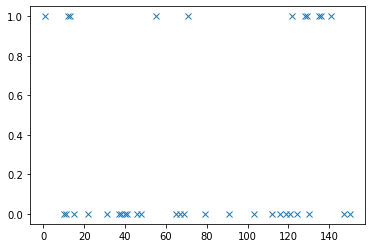

In [72]:
plt.plot(linear_svr_y_predict-y_test['Severe BPD'],'x')

In [19]:
#第五步：对三种核函数配置下的支持向量机回归模型在相同测试集下进行性能评估
#使用R-squared、MSE、MAE指标评估
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#1.线性核函数配置的SVR
print('R-squared value of linear SVR is',linear_svr.score(X_test,y_test))
# print('the MSE of linear SVR is',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(linear_svr_y_predict)))
# print('the MAE of linear SVR is',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(linear_svr_y_predict)))
#2.多项式核函数配置的SVR
print('R-squared value of Poly SVR is',poly_svr.score(X_test,y_test))
# print('the MSE of Poly SVR is',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(poly_svr_y_predict)))
# print('the MAE of Poly SVR is',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(poly_svr_y_predict)))
#3.径向基核函数配置的SVR
print('R-squared value of RBF SVR is',rbf_svr.score(X_test,y_test))
# print('the MSE of RBF SVR is',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(rbf_svr_y_predict)))
# print('the MAE of RBF SVR is',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(rbf_svr_y_predict)))

R-squared value of linear SVR is -0.47871203446081223
R-squared value of Poly SVR is -0.2471783354804962
R-squared value of RBF SVR is -0.21944438458901883


In [29]:
mask = data["Growth retardation"]==1
ww = (data["Birth Weight (grams)"]/data["Birth Gestation (weeks)"])[mask]
ww2 = (data["Birth Weight (grams)"]/data["Birth Gestation (weeks)"])[~mask]

(array([0.02155366, 0.02155366, 0.04849573, 0.04849573, 0.05927256,
        0.05388415, 0.05118994, 0.02963628, 0.01077683, 0.00808262]),
 array([21.66666667, 24.5       , 27.33333333, 30.16666667, 33.        ,
        35.83333333, 38.66666667, 41.5       , 44.33333333, 47.16666667,
        50.        ]),
 [<matplotlib.patches.Polygon at 0x7f7f84e78240>])

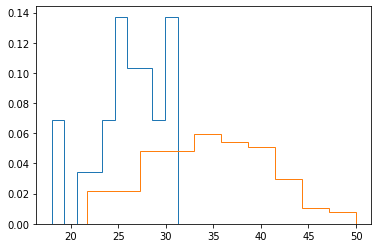

In [31]:

plt.hist(ww, bins=10, histtype='step',density=True)
plt.hist(ww2, bins=10, histtype='step',density=True)

(array([0.08549618, 0.14656489, 0.        , 0.25648855, 0.36641221,
        0.        , 0.40305344, 0.34198473]),
 array([23.   , 23.625, 24.25 , 24.875, 25.5  , 26.125, 26.75 , 27.375,
        28.   ]),
 [<matplotlib.patches.Polygon at 0x7f7f892f5f60>])

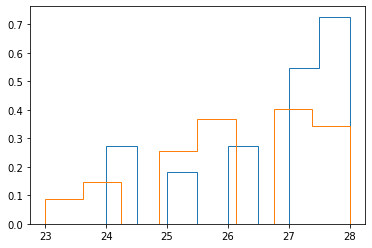

In [24]:
ww = data["Birth Gestation (weeks)"][mask]
ww2 = data["Birth Gestation (weeks)"][~mask]
plt.hist(ww, bins=8, histtype='step',density=True)
plt.hist(ww2, bins=8, histtype='step',density=True)

(array([0.00046382, 0.00069573, 0.00162338, 0.00173933, 0.00139147,
        0.00173933, 0.00185529, 0.00069573, 0.00081169, 0.00034787]),
 array([ 520.,  608.,  696.,  784.,  872.,  960., 1048., 1136., 1224.,
        1312., 1400.]),
 [<matplotlib.patches.Polygon at 0x7f7f84a55390>])

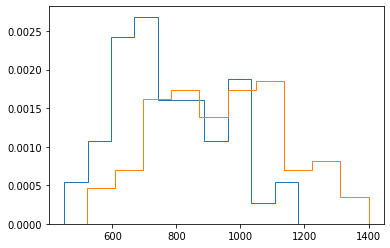

In [41]:
condition_col = data["Severe BPD"]
mask = condition_col==1
mask2 = condition_col==2

plot_col = data["Birth Weight (grams)"]
ww = plot_col[mask]
ww2 = plot_col[mask2]
plt.hist(ww, bins=10, histtype='step',density=True)
plt.hist(ww2, bins=10, histtype='step',density=True)